## 1. Regularization

Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. You must python.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 

In [238]:
hitters = pd.read_csv("Hitters.csv")

In [239]:
#preview hitters dataset
#hitters.head()

In [194]:
#convert the categorical data into numeric data
League_num = []
for row in hitters["League"]:
    if row == "A":
        League_num.append(0)
    else: 
        League_num.append(1)

Division_num = []
for row in hitters["Division"]:
    if row == "A":
        Division_num.append(0)
    else: 
        Division_num.append(1)

NewLeague_num = []
for row in hitters["NewLeague"]:
    if row == "E":
        NewLeague_num.append(0)
    else: 
        NewLeague_num.append(1)

In [195]:
hitters["League_num"] = pd.Series(League_num)
hitters["Division_num"] = pd.Series(Division_num)
hitters["NewLeague_num"] = pd.Series(NewLeague_num)

In [196]:
hitters = hitters.drop(['League', 'Division', 'NewLeague'], axis = 1)

In [197]:
#drop the first column which is useless
hitters.drop(["Unnamed: 0"], axis = 1, inplace = True)
#drop the null value
hitters = hitters.dropna()

In [198]:
#take out the target variable
y_salary = hitters["Salary"]

In [199]:
#drop the target column
X = hitters.drop(["Salary"], axis = 1)
#preview the dataset without label
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_num,Division_num,NewLeague_num
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,1,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,1,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,1


In [200]:
#train-test-split
X_train, X_test , y_train, y_test = train_test_split(X, y_salary, test_size=0.3, random_state=0)

## 1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [205]:
from sklearn.linear_model import Lasso, LassoCV

In [206]:
#create a series of alpha that ranges from 0.0001 to 500000
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]

In [207]:
lasso = Lasso(max_iter = 10000, normalize = True, tol = 0.0001)

                 0
Hits     70.330101
RBI       0.797665
Walks    25.453741
CHits    27.834391
CRuns    99.061631
PutOuts   6.720880


Text(0, 0.5, 'Weights')

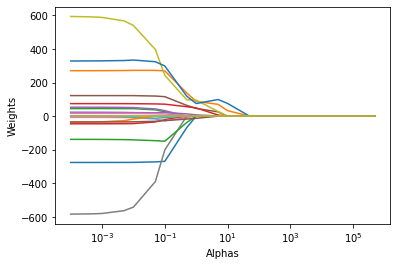

In [212]:
coefficients = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefficients.append(lasso.coef_)
    # From the plot we can tell the final 3 predictors can be found when alpha ranged from 1 to 10, so print the name of the predictors left in this range
    # Top 3 Predictors with largest value are the final predictors
    if 1 < a < 10:
        predictors = pd.DataFrame(lasso.coef_, X.columns)
        predictors = predictors[predictors[0] > 0]
        print(predictors)
        
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Weights')

## Comment

 The last 3 predictors are **CRuns**, **Hits** and **CHits**.

In [164]:
#use Cross Validation to find the best alpha
lasso_CV = LassoCV(max_iter = 100000, normalize = True, tol = 0.0001, cv = 5, alphas = None)
lasso_CV.fit(X_train, y_train)

#use the best alpha to fit lasso regression again
lasso.set_params(alpha=lasso_CV.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.9958003222801155, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [189]:
#Check how many predictors are left
predictors = pd.DataFrame(lasso.coef_, X.columns)
predictors = predictors[predictors[0] > 0]
predictors

,0
Hits,1.775549
RBI,0.270162
Walks,1.912890
CHits,0.119952
CRuns,0.307912
PutOuts,0.135739


## Comment

The **best alpha** for 5-fold cross validation is alpha=1.9958003222801155 and the **6** predictors left are: **Hits**, **RBI**, **Walks**, **CHits**, **CRuns**, **PutOuts**.

## 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.


In [159]:
from sklearn.linear_model import Ridge, RidgeCV

In [228]:
#create a series of alpha that ranges from 0.0001 to 500000
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

In [229]:
ridge = Ridge(max_iter = 10000, normalize = True, tol = 0.0001)

                0
AtBat    0.000168
Hits     0.000188
HmRun    0.000138
Runs     0.000177
RBI      0.000176
Walks    0.000173
Years    0.000150
CAtBat   0.000203
CHits    0.000216
CHmRun   0.000173
CRuns    0.000220
CRBI     0.000202
CWalks   0.000180
PutOuts  0.000100
Assists  0.000024
Errors   0.000005


Text(0, 0.5, 'Weights')

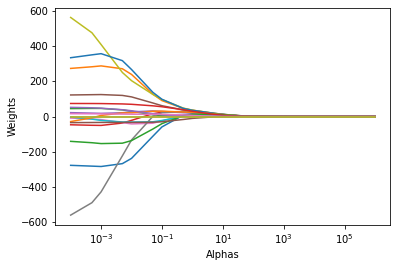

In [230]:
coefficients = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefficients.append(ridge.coef_)
    # From the plot we can tell the final 3 predictors can be found when alpha is very large, so print the name of the predictors left in this range
    # Top 3 Predictors with largest weights are the final predictors left
    if a == 1000000:
        predictors = pd.DataFrame(ridge.coef_, X.columns)
        predictors = predictors[predictors[0] > 0]
        print(predictors)
        
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Weights')

## Comment

As the alpha increased to a very large value, almost all the predictors are still left. But from the weights of these predictors we can still tell the final 3 predictors are **CRuns**, **CHits** and **CAtBat**.

In [235]:
#use Cross Validation to find the best alpha
ridge_CV = RidgeCV(alphas = alphas, normalize = True, cv = 5)
ridge_CV.fit(X_train, y_train)

#use the best alpha to fit lasso regression again
ridge.set_params(alpha=ridge_CV.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, random_state=None, solver='auto', tol=0.0001)

In [236]:
#Check how many predictors are left
predictors = pd.DataFrame(ridge.coef_, X.columns)
predictors = predictors[predictors[0] > 0]
predictors

,0
AtBat,0.111186
Hits,0.799805
HmRun,0.973776
Runs,1.073717
RBI,0.838013
Walks,1.505632
Years,2.268288
CAtBat,0.012405
CHits,0.062553
CHmRun,0.123001


## Comment
The **best alpha** for ridge cross validation is alpha=1.0 from my choices of alphas, and there are 16 predictors left, shown in the table above.

## 2

Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

## My Answer:
Bias-Variance Tradeoff indicates that when you want your model to be more interpretable or simpler, it is going to have a higher bias(underfitting). If you want to have a low-biased model, then it is going to be complex and could results in overfitting.

Regularization actually makes model simpler, so it reduces the complexity but brings more biases to the model.

In the above ridge regression and lasso regression example, if alpha is zero, the model will be too complex and result in overfitting, if alpha is too large, the coefficients will be smaller than they ought to be to get the best predictive accuracy. So we perform cross validation to find the best alpha so that we found a balance between the bias and variance. 